In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns

# Data Loading

In [ ]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1", parse_dates=['InvoiceDate'])

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

# Missing Value Check

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [ ]:
df[(~df['CustomerID'].isna()) & df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df.isna().sum() / df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

All Null `Description` comes from Null `CustomerID`. Since `CustomerID` can't be filled, and we need this variable, then we have to drop 25% of our data. 

In [ ]:
df = df[~df['CustomerID'].isna()].reset_index(drop=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Variable Exploration

In [ ]:
df['CustomerID'].nunique()

4372

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [ ]:
# convert to date
df['Date'] = df['InvoiceDate'].apply(lambda x: x.date())

<Axes: xlabel='Date'>

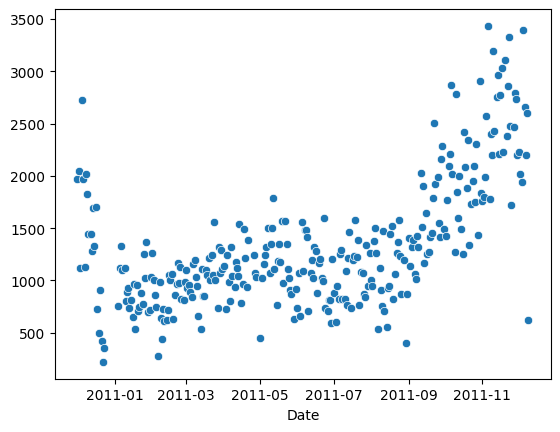

In [ ]:
# looking for anomaly
sns.scatterplot(data=df.groupby('Date').size())

In [ ]:
df['UnitPrice'].describe()

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

<Axes: >

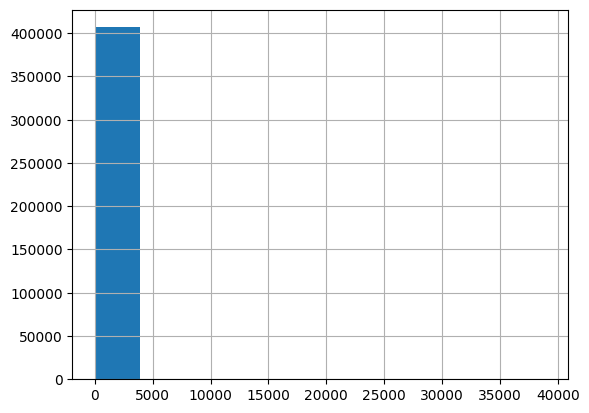

In [ ]:
df['UnitPrice'].hist()

In [ ]:
df['Quantity'].describe()

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

We have quantity less than 0. **Assumption**: Give away item. Need to exclude it.

In [ ]:
df[df['Quantity'] <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01


In [ ]:
df[df['Quantity'] <= 0].shape[0] / df.shape[0]

0.021888803403887137

Less than 2%, drop it.

In [ ]:
df = df[df['Quantity'] > 0].reset_index(drop=True)

# Feature Engineering

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [ ]:
MAX_DATE = df['Date'].max()

In [ ]:
# assuming we get from the recent date
df['Recency'] = df['Date'].apply(lambda x: (MAX_DATE - x).days)

In [ ]:
df['Recency'].describe()

count    397924.000000
mean        151.562839
std         112.819533
min           0.000000
25%          50.000000
50%         131.000000
75%         246.000000
max         373.000000
Name: Recency, dtype: float64

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('int')
df_agg = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'Recency': 'min',
    'InvoiceNo': 'count'
}).reset_index()
df_agg.columns = ['CustomerID', 'Monetary', 'Recency', 'Frequency']

In [ ]:
df_agg.head()

,CustomerID,Monetary,Recency,Frequency
0,12346,77183.60,325,1
1,12347,4310.00,2,182
2,12348,1797.24,75,31
3,12349,1757.55,18,73
4,12350,334.40,310,17


In [ ]:
df_agg.describe()

,CustomerID,Monetary,Recency,Frequency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2053.793018,92.041484,91.708689
std,1721.889758,8988.248381,100.007757,228.792852
min,12346.000000,0.000000,0.000000,1.000000
25%,13812.500000,307.245000,17.000000,17.000000
50%,15299.000000,674.450000,50.000000,41.000000
75%,16778.500000,1661.640000,141.500000,100.000000
max,18287.000000,280206.020000,373.000000,7847.000000


# Quartile Segmentation

In [ ]:
df_agg['Monetary_Label'] = pd.qcut(
    df_agg['Monetary'], 
    q=4, 
    labels=[1, 2, 3, 4]
)
df_agg['Monetary_Label'].head()

0    4
1    4
2    4
3    4
4    2
Name: Monetary_Label, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
df_agg['Frequency_Label'] = pd.qcut(
    df_agg['Frequency'],
    q=4,
    labels=[1, 2, 3, 4]
)
df_agg['Frequency_Label'].head()

0    1
1    4
2    2
3    3
4    1
Name: Frequency_Label, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
df_agg['Recency_Label'] = pd.qcut(
    df_agg['Recency'],
    q=4,
    labels=[4, 3, 2, 1]
)
df_agg['Recency_Label'].head()

0    1
1    4
2    2
3    3
4    1
Name: Recency_Label, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [ ]:
df_agg.head()[['CustomerID', 'Monetary_Label', 'Frequency_Label', 'Recency_Label']]

,CustomerID,Monetary_Label,Frequency_Label,Recency_Label
0,12346,4,1,1
1,12347,4,4,4
2,12348,4,2,2
3,12349,4,3,3
4,12350,2,1,1


# RFM Classification
RFM
4|4|>=3 - Big Fish

4|4|<3 - Loyal Customer

(3)|>=3|X - Regular Customer

(3)|<=2|X - Infrequent Customer

1XX - Lost Customer

<3|>=3|>=3 - Can't Lose

<3|X|X - About Churn



In [ ]:
def make_category(R,F,M):
    if R == 4 and F == 4 and M >= 3: return 'Big Fish'
    elif R >= 3 and F >= 3: return 'Regular Customer'
    elif R >= 3 and F <= 2: return 'Seasonal/New Customer'
    elif R == 2 and F >= 3 and M >= 3: return "Can't Lose"
    elif R == 2: return 'About to Churn'
    elif R == 1: return 'Lost Customer'
    else: return '??'

df_agg['category'] = df_agg.apply(
    lambda x: make_category(
        x['Recency_Label'], 
        x['Frequency_Label'], 
        x['Monetary_Label']
    ),
    axis=1
)

In [ ]:
df_agg_cat = df_agg.groupby('category').size().to_frame('total').reset_index()

<Axes: xlabel='total', ylabel='category'>

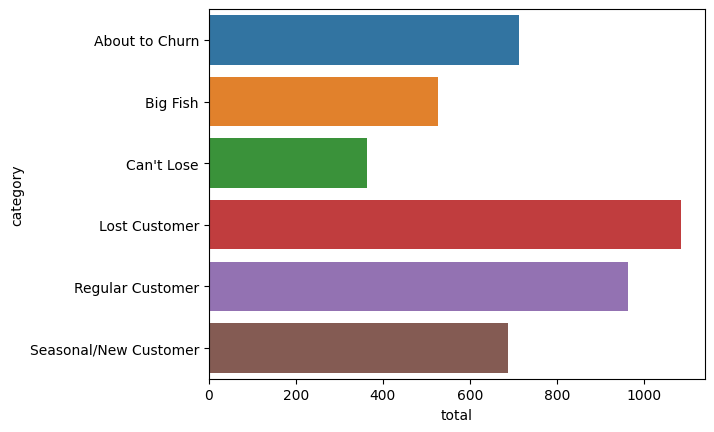

In [ ]:
sns.barplot(data=df_agg_cat, x='total', y='category')

In [ ]:
df_agg_clusters = df_agg[['CustomerID', 'Monetary', 'Recency', 'Frequency']].reset_index()
df_agg_clusters

,index,CustomerID,Monetary,Recency,Frequency
0,0,12346,77183.60,325,1
1,1,12347,4310.00,2,182
2,2,12348,1797.24,75,31
3,3,12349,1757.55,18,73
4,4,12350,334.40,310,17
...,...,...,...,...,...
4334,4334,18280,180.60,277,10
4335,4335,18281,80.82,180,7
4336,4336,18282,178.05,7,12
4337,4337,18283,2094.88,3,756


# Segmenting Using Unsupervised Learning

Apart from using quartile to segmenting the data, we could use another technique such as clustering to automatically find cluster from the data.
In this simple experiment, we will use KMeans to find the segment.

# Data Scaling

Since the data having different range (i.e price in hundred thousand, but frequency in 1-100), it's a good idea to scale the data so when doing distance calculation, one variable doesn't hugely impact the calculation.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = {}
for key in ('Monetary', 'Recency', 'Frequency'):
    scaler[key] = StandardScaler()
    df_agg_clusters['scaled_{}'.format(key)] = scaler[key].fit_transform(df_agg_clusters[[key]])

In [ ]:
df_agg_clusters.head()

,index,CustomerID,Monetary,Recency,Frequency,scaled_Monetary,scaled_Recency,scaled_Frequency
0,0,12346,77183.60,325,1,8.359634,2.329673,-0.396512
1,1,12347,4310.00,2,182,0.251046,-0.900449,0.394688
2,2,12348,1797.24,75,31,-0.028546,-0.170421,-0.265374
3,3,12349,1757.55,18,73,-0.032963,-0.740443,-0.081781
4,4,12350,334.40,310,17,-0.191315,2.179667,-0.326572


# Find the best K

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=19, random_state=5),
                 k=(2, 20))

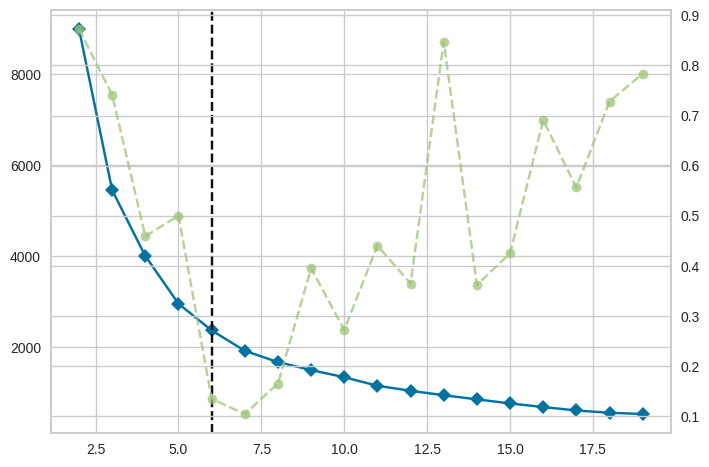

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(2, 20))
X = df_agg_clusters[['scaled_Recency', 'scaled_Frequency', 'scaled_Monetary']]
visualizer.fit(X)

# Modeling

In [ ]:
model = KMeans(6, random_state=5)
clusters = model.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_agg_clusters['cluster'] = clusters

In [ ]:
df_agg_clusters.groupby('cluster').size()

cluster
0    2923
1    1056
2      14
3       4
4     338
5       4
dtype: int64

### Interpreting Result

<Axes: xlabel='cluster', ylabel='Monetary'>

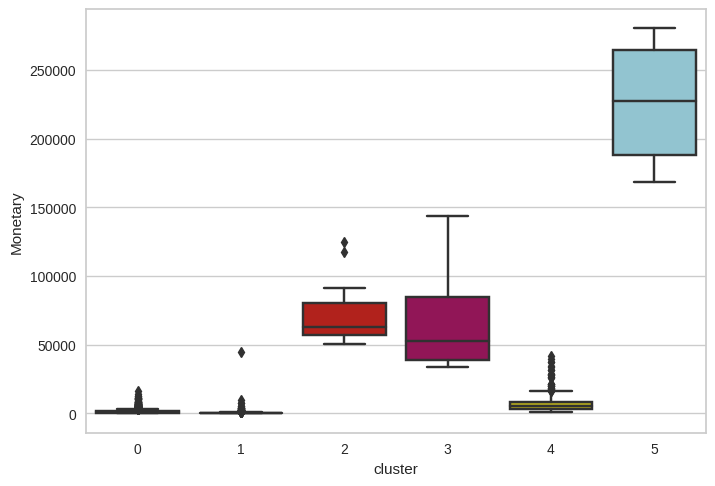

In [ ]:
sns.boxplot(data=df_agg_clusters, x='cluster', y='Monetary')

<Axes: xlabel='cluster', ylabel='Recency'>

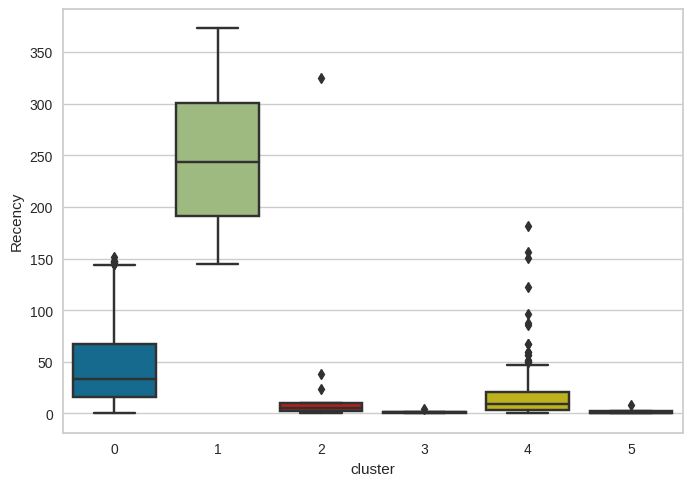

In [ ]:
sns.boxplot(data=df_agg_clusters, x='cluster', y='Recency')

<Axes: xlabel='cluster', ylabel='Frequency'>

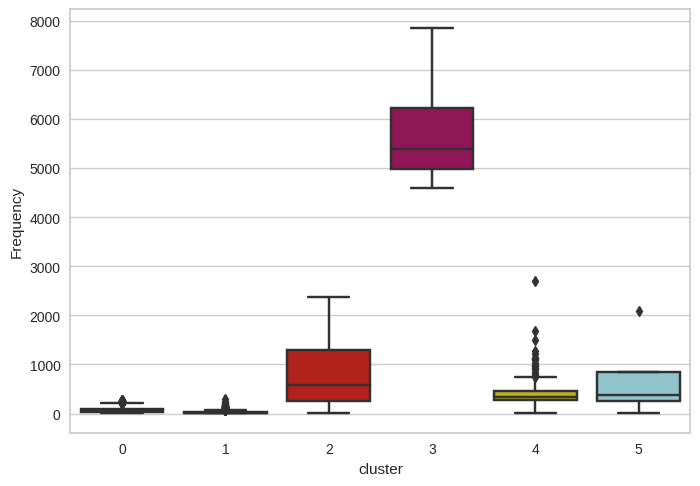

In [ ]:
sns.boxplot(data=df_agg_clusters, x='cluster', y='Frequency')